<a href="https://colab.research.google.com/github/BRCInc-dev/Data-Analysis-Tools/blob/main/customer_churn_dataset_training_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install imbalanced-learn

In [5]:
# Importuojame reikalingas bibliotekas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Nuskaitome duomenis
file_path = "/content/customer_churn_dataset-training-master (5).csv"  # Pakeiskite kelią į savo duomenų failą
df = pd.read_csv(file_path)

# Pažvelkime į duomenų rėmelio pagrindinę informaciją
print(df.head())
print(df.info())
print(df.describe())

# 1. Missing Values Analysis ir Handling
print("\nTrūkstamų reikšmių analizė:")
print(df.isnull().sum())



   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           2   30  Female    39.0             14.0            5.0   
1           3   65  Female    49.0              1.0           10.0   
2           4   55  Female    14.0              4.0            6.0   
3           5   58    Male    38.0             21.0            7.0   
4           6   23    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0  
<c

In [6]:
# Skaičiuojame medianą tik skaitinėms kolonėlėms.
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()) # Tik tuomet užpildome tuščias reikšmes medianomis


In [7]:
# Patikriname ar visos reikšmės yra užpildytos.
print(df.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    1
Contract Length      1
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
# Patikriname ar visos reikšmės yra užpildytos.
print(df.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    1
Contract Length      1
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [9]:
!pip install imbalanced-learn

# Importuojame reikalingas bibliotekas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Nuskaitome duomenis
file_path = "/content/customer_churn_dataset-training-master (5).csv"  # Pakeiskite kelią į savo duomenų failą
df = pd.read_csv(file_path)

# Pažvelkime į duomenų rėmelio pagrindinę informaciją
print(df.head())
print(df.info())
print(df.describe())

# 1. Missing Values Analysis ir Handling
print("\nTrūkstamų reikšmių analizė:")
print(df.isnull().sum())

# Skaičiuojame medianą tik skaitinėms kolonėlėms.
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()) # Tik tuomet užpildome tuščias reikšmes medianomis

# Patikriname ar visos reikšmės yra užpildytos.
print(df.isnull().sum())

# Jei yra duomenų trūkumų, galime juos pildyti ar šalinti
# df.fillna(df.median(), inplace=True)  # Praleistas reikšmes užpildome mediana # removed

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           2   30  Female      39               14              5   
1           3   65  Female      49                1             10   
2           4   55  Female      14                4              6   
3           5   58    Male      38               21              7   
4           6   23    Male      32               20              5   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             18          Standard          Annual        932.0   
1              8             Basic         Monthly        557.0   
2             18             Basic       Quarterly        185.0   
3              7          Standard         Monthly        396.0   
4              8             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0  
<c

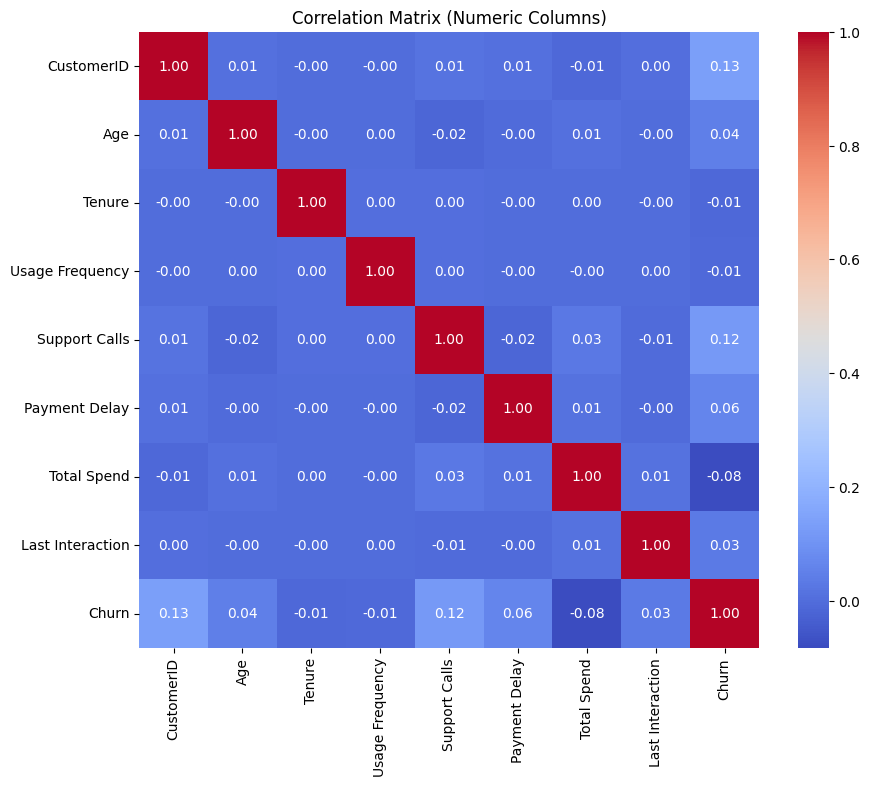

In [ ]:
 #2. EDA: Data Visualization
# Correlation (only for numeric columns)
plt.figure(figsize=(10, 8))
correlation = df[numeric_cols].corr() # Correctly using the already existing numerical columns to calculate the correlation.
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numeric Columns)")
plt.show()

# Scatter plots example
sns.pairplot(df, hue="Churn", diag_kind="kde")
plt.show()

# Histograms
df.drop('CustomerID', axis=1).hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for All Variables')
plt.show()

# Churn analysis
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# 3. Data Preparation for Modeling
# Encode categorical columns
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Encode the target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate dependent and independent variables
X = df.drop(['CustomerID', 'Churn'], axis=1)  # Independent variables
y = df['Churn']  # Target variable

# Balance analysis
print(y.value_counts(normalize=True))

# Use SMOTE to address the class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nClass Distribution after Balancing:")
print(pd.Series(y_resampled).value_counts())

# Data splitting into training and testing sets
print("\nReport Complete!")